In [2]:
#Angel Azahel Ramírez Cabello A01383328

# Estos son algunos de los módulos que emplearás.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Paso 1: Cargar datos y descripción básica

In [86]:
# 1. Lee el dataset del archivo iris_binary.txt  y genera un dataframe de pandas.
# // se uso el de genero.txt que se descargo desde canvas //
raw_data= pd.read_csv("reto.csv", sep=",")

# 2. Muestra algunos
raw_data.head()
raw_data["fecha_transaccion"][1]


'2023-01-28 13:58:00'

In [63]:
datos=[1,2,3,4,5]

a=pd.DataFrame(data=raw_data,columns=["fecha_transaccion"])
a.index

,fecha_transaccion
0,2023-01-20 13:48:00
1,2023-01-28 13:58:00
2,2023-01-29 13:37:00
3,2023-02-11 15:06:00
4,2023-01-24 12:50:00
...,...
358355,2023-01-13 14:36:00
358356,2022-11-27 02:22:00
358357,2023-02-27 15:35:00
358358,2022-12-09 18:28:00


In [111]:
lista = raw_data['fecha_transaccion'].str.split(" ")
l=lista[1]
fecha=[]
hora=[]
for i in range (len(lista)):
    fecha.append(lista[i][0])
    hora.append(lista[i][1])


['13:48:00',
 '13:58:00',
 '13:37:00',
 '15:06:00',
 '12:50:00',
 '14:00:00',
 '17:24:00',
 '14:41:00',
 '22:43:00',
 '20:18:00',
 '13:56:00',
 '02:49:00',
 '14:59:00',
 '19:53:00',
 '11:15:00',
 '17:56:00',
 '10:31:00',
 '08:16:00',
 '15:55:00',
 '18:41:00',
 '13:42:00',
 '09:39:00',
 '14:14:00',
 '10:21:00',
 '18:52:00',
 '16:35:00',
 '07:42:00',
 '08:33:00',
 '11:47:00',
 '18:58:00',
 '18:20:00',
 '22:43:00',
 '09:01:00',
 '17:13:00',
 '06:13:00',
 '19:33:00',
 '12:52:00',
 '20:47:00',
 '18:14:00',
 '13:30:00',
 '20:42:00',
 '18:12:00',
 '14:42:00',
 '20:11:00',
 '12:12:00',
 '20:15:00',
 '13:57:00',
 '17:26:00',
 '10:13:00',
 '15:07:00',
 '06:49:00',
 '18:56:00',
 '20:06:00',
 '21:02:00',
 '17:52:00',
 '17:48:00',
 '23:26:00',
 '19:17:00',
 '07:15:00',
 '15:15:00',
 '12:56:00',
 '08:04:00',
 '17:34:00',
 '17:47:00',
 '15:19:00',
 '14:13:00',
 '15:13:00',
 '13:13:00',
 '17:36:00',
 '15:17:00',
 '11:37:00',
 '15:48:00',
 '10:08:00',
 '18:29:00',
 '15:38:00',
 '23:03:00',
 '14:01:00',

In [122]:

Fecha=[]
for i in range(len(fecha)):
    Fecha.append(fecha[i].split("-"))
    
Fecha
Hora = []
for i in range(len(hora)):
    Hora.append(hora[i].split(":"))

In [134]:
Fecha = pd.DataFrame(Fecha,columns=["Año","Mes","Dia"])
Hora = pd.DataFrame(Hora,columns=["Hora","Minuto"])
Tiempo = np.concatenate((Fecha,Hora),axis=1)
Tiempo = pd.DataFrame(Tiempo,columns=["Año","Mes","Dia","Hora","Minuto" ])
Tiempo["Hora"].min()
Tiempo

,Año,Mes,Dia,Hora,Minuto
0,2023,01,20,13,48
1,2023,01,28,13,58
2,2023,01,29,13,37
3,2023,02,11,15,06
4,2023,01,24,12,50
...,...,...,...,...,...
358355,2023,01,13,14,36
358356,2022,11,27,02,22
358357,2023,02,27,15,35
358358,2022,12,09,18,28


In [136]:
date= pd.read_csv("e.csv", sep=" ",index_col=[1,2])
Tiempo["Dia"].value_counts()


04    13489
03    13146
15    13040
02    12619
18    12579
14    12537
17    12450
28    12323
07    12249
16    12235
05    12225
21    12160
19    12042
06    12038
01    11929
20    11834
22    11636
11    11623
13    11618
10    11541
23    11468
12    11445
24    11434
27    11312
26    11246
09    11002
08    10824
25    10710
30     8892
29     8527
31     6187
Name: Dia, dtype: int64

In [15]:
raw_data["tipo_transaccion"].value_counts()

TDD    209698
TDC    148662
Name: tipo_transaccion, dtype: int64

In [16]:
raw_data["nombre_comercio"].value_counts()

MERCADO PAGO          CIUDAD DE MEXDF     8816
STP*UBER PENDING      CIUDAD DE MEX001    6402
SNP*MERCADOPAGO       CIUDAD DE MEX001    6369
DLOCAL*DIDI RIDES     CIUDAD DE MEX001    4757
PAYPAL3               MEXICO DF    DF     2932
                                          ... 
SANBORNS SLP PZA CARSOSN LUIS POTOSSL        1
GALLARDO ORTODONCIA   MEXICALI     BC        1
GASOL TLACOTEPEC      TOLUCA EM    000       1
CHARLEYS PHILLY STEAKS 51SAN ANTONIO         1
FIRST CASH            SOLEDAD DE GR000       1
Name: nombre_comercio, Length: 84774, dtype: int64

In [24]:
raw_data["monto_transaccion"].value_counts()


59.85     8317
109.75    6154
34.90     4810
259.45    3959
159.65    3887
          ... 
217.56       1
161.59       1
246.57       1
347.19       1
531.91       1
Name: monto_transaccion, Length: 44043, dtype: int64

In [19]:
raw_data["entry_mode"].value_counts()

CARD PRESENT        227208
CARD NOT PRESENT    131152
Name: entry_mode, dtype: int64

In [23]:
raw_data["estado_cliente"].value_counts()

NUEVO LEON                        79696
CIUDAD DE MEXICO                  51734
MEXICO                            35964
JALISCO                           28389
BAJA CALIFORNIA                   13849
QUERETARO                         12274
CHIHUAHUA                         11725
COAHUILA DE ZARAGOZA              11665
GUANAJUATO                        10511
VERACRUZ DE IGNACIO DE LA LLAV    10029
QUINTANA ROO                       8654
PUEBLA                             8433
YUCATAN                            7880
TAMAULIPAS                         7827
SONORA                             7421
SAN LUIS POTOSI                    6531
SINALOA                            5004
AGUASCALIENTES                     4843
MICHOACAN DE OCAMPO                4307
DURANGO                            4225
HIDALGO                            3857
MORELOS                            3828
TABASCO                            3317
BAJA CALIFORNIA SUR                2985
CHIAPAS                            2546


In [22]:
raw_data["edad_cliente"].value_counts()

27.0    19220
31.0    17623
25.0    17403
26.0    17108
30.0    16997
        ...  
12.0       20
77.0       15
11.0        8
3.0         8
82.0        2
Name: edad_cliente, Length: 80, dtype: int64

In [34]:

# 3. Analiza la información básica del dataset: número de instancias, número de atributos, tipos de datos de los
# atributos entre otros. ¿Qué método genera esto?
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [35]:

# 4. Genera información con base en estadística descriptiva.
raw_data.describe()


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [36]:

# 5. Cuenta el número de clases de la variable de salida.
raw_data["Gender"].value_counts()


Male      5000
Female    5000
Name: Gender, dtype: int64

In [37]:
# Mostrar valores de correlación (hint: corr)
raw_data.corr()


C:\Users\angel\AppData\Local\Temp/ipykernel_32432/710373675.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.corr()


,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


## En este apartado escribe tus observaciones sobre este primer paso. ¿Qué puedes decir con base en la información básica del dataset?

* Aquí escribe todas tus observaciones
* Existe la misma cantidad de instancias de cada clase
* Se trata de un dataset con clases binarias
* De acuerdo con el coeficiente de correlación las dos variables numéricas tienen influencia entre sí
* El dataset tiene 10000 instancias
* El peso es la métrica con mayor desviación estándar en los datos

# Paso 2: Gráficas del dataset

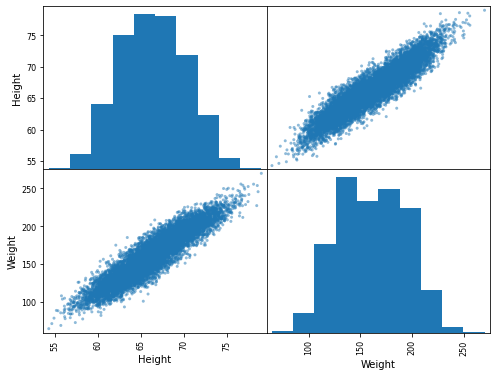

In [38]:
# Mostrar scatter_matrix (hint: scatter_matrix)
from pandas.plotting import scatter_matrix
attributes=["Height", "Weight"]
scatter_matrix(raw_data[attributes],figsize=(8,6))
plt.show()

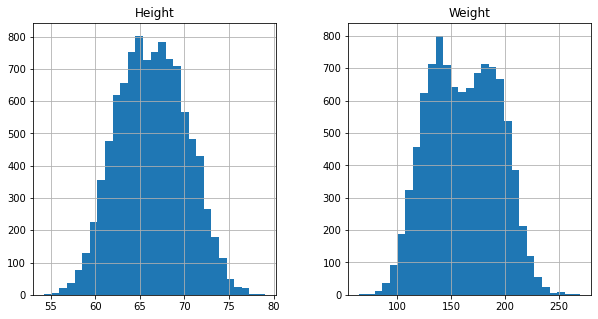

In [39]:
# Generar histogramas para los atributos numéricos (hint: hist)
raw_data.hist(bins=29,figsize=(10,5))
plt.show()

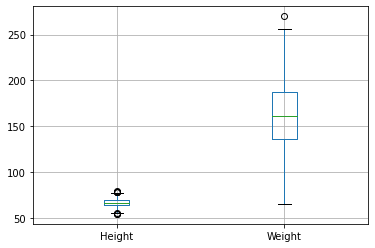

In [40]:
# Boxplots de los atributos numéricos
raw_data.boxplot()
plt.show()

## En esta sección redacta tus observaciones con base en la interpretación de todas las gráficas solicitadas.

* Aquí escribe tus observaciones
* Se refleja claramente la correlación directa y alta entre peso y altura en las gráficas de dispersión
* La distribución de la altura asemeja a una normal
* El peso parece tener una distribución alejada a la normal
* En el bloxplot se observa que la altura tiene poca varianza entre sus datos
* Se refleja el alto valor de desviación estándar de los datos en el peso, observando el boxplot.

# Paso 3: Preparar dataset

In [41]:
# Cambia los atributos categóricos en una representación que pueda ser procesada rápidamente por un algoritmo de 
# aprendizaje automático.
raw_data.replace("Male",0,inplace=True)
raw_data.replace("Female",1,inplace=True)
raw_data.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [42]:
# Genera la matriz de instancias y el vector de salidas (hint: numpy array)

#Separar los datos crudos en una matriz para atributos y un vector para la clasificación
X=np.array(raw_data[["Height","Weight"]])
Y=np.array(raw_data[["Gender"]])

#Aplicar normalizacion MinMax
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [43]:
# Genera los training y test sets (hint: train_test_split)



from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42) #80% de training y 20% de test, 42 es la semilla de aleatoreidad.

# Paso 4: Crea el modelo del árbol de decisión
# Usa el módulo DecisionTreeClassifier de Scikit-learn

In [44]:
# Usa los árboles de decisión (algoritmo CART: produce solo árboles binarios)
# Genera el objeto para el modelo
# Ajusta el modelo al training set (hint: fit)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

ModelTr = DecisionTreeClassifier(max_depth=2)
ModelTr = ModelTr.fit (X_train,Y_train)


[Text(0.5, 0.8333333333333334, 'Weight <= 0.476\ngini = 0.5\nsamples = 8000\nvalue = [3988, 4012]'),
 Text(0.25, 0.5, 'Weight <= 0.426\ngini = 0.183\nsamples = 4107\nvalue = [418, 3689]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.088\nsamples = 3395\nvalue = [157, 3238]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.464\nsamples = 712\nvalue = [261, 451]'),
 Text(0.75, 0.5, 'Weight <= 0.525\ngini = 0.152\nsamples = 3893\nvalue = [3570, 323]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.423\nsamples = 712\nvalue = [496, 216]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.065\nsamples = 3181\nvalue = [3074, 107]')]

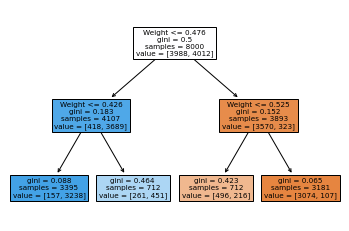

In [45]:
# Gráficar el árbol de decisión
from sklearn.tree import export_graphviz
from sklearn import tree

tree.plot_tree(ModelTr,filled=True,feature_names=['Height','Weight'])

In [46]:

attr_names = ["nombre_atributo1", "nombre_atributo2", "...", "nombre_atributoN"]
class_names = ["clase1", "clase2"]
export_graphviz(ModelTr, 
                out_file="my_tree.dot",
                feature_names=attributes,
                class_names=class_names,
                rounded=True,
                filled=True
)
# Instalar Graphviz: https://graphviz.org/download/
# Una vez instalador, ejecutar lo siguiente en la terminal (en el directorio donde esté el archivo my_tree.dot):
# >dot -Tpng my_tree.dot -o my_tree.png

# Paso 5: Usa el modelo para realizar predicciones

In [47]:
# Realizar predicciones con base en el test set
y_pred = ModelTr.predict(X_test)
print(y_pred)



[0 0 0 ... 1 0 1]


# Paso 6: Evalúa el modelo usando todas las herramientas de evaluación de clasificadores binarios.

In [48]:
print("El modelo tiene :",metrics.accuracy_score(Y_test, y_pred)*100,"% de precision")

El modelo tiene : 91.05 % de precision


In [49]:

from sklearn.metrics import precision_score
precision = precision_score(Y_test,y_pred)
print("EL modelo tiene una precision del {0}% ".format(precision*100))

EL modelo tiene una precision del 90.5717151454363% 


In [50]:
from sklearn.metrics import recall_score
recall= recall_score(Y_test,y_pred)
print("El modelo tiene un recall del {0}%".format(recall*100))

El modelo tiene un recall del 91.39676113360325%


In [51]:
from sklearn.metrics import f1_score
f1= f1_score(Y_test,y_pred)
print("El modelo tiene un f1 del {0}%".format(f1*100))

El modelo tiene un f1 del 90.9823677581864%


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[918,  94],
       [ 85, 903]], dtype=int64)

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)

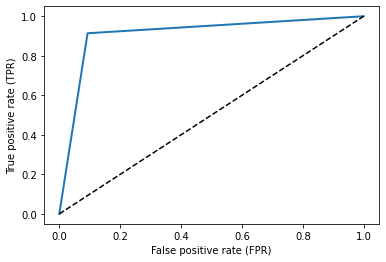

In [54]:
def plot_roc_curve(fpr, tpr, label =None):
    plt.plot(fpr, tpr, linewidth=2, label =label)
    plt.plot([0,1],[0,1], "k--")
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
plot_roc_curve(fpr,tpr)
plt.show()

## Analiza la información generada por las herramientas de evaluación. 
## ¿Qué conclusiones puedes obtener del comportamiento del árbol de decisión?



El comportamiento del árbol de decisión es bastante satisfactorio, puesto que puede 
predecir con un porcentaje bastante alto de precisión los datos de prueba deseados sin llegar a ajustar demasiado, 
igualmente muestra de forma bastante visual el proceso de clasificación con la imagen del árbol.

# Paso 7: Usando el training set y test set que generaste en este script, crea el modelo para k-NN y evalúa su desempeño con todas las herramientas que usaste para el árbol de decisión. Analiza los resultados de los dos algoritmos y compara su desempeño. ¿Algún algoritmo se comporta mejor que el otro? Escribe aquí todas tus observaciones.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, algorithm="brute") #k=3
knn.fit(X_train,Y_train.ravel())
Y_pred =knn.predict(X_test) #Esto va a resultar en una h(xtest) predictora

In [56]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test,Y_pred)
print("EL modelo tiene una precision del {0}% ".format(precision*100))

EL modelo tiene una precision del 91.9753086419753% 


In [57]:
from sklearn.metrics import recall_score
recall= recall_score(Y_test,Y_pred)
print("El modelo tiene un recall del {0}%".format(recall*100))

El modelo tiene un recall del 90.48582995951418%


In [58]:
from sklearn.metrics import f1_score
f1= f1_score(Y_test,Y_pred)
print("El modelo tiene un f1 del {0}%".format(f1*100))

El modelo tiene un f1 del 91.22448979591837%


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[934,  78],
       [ 94, 894]], dtype=int64)

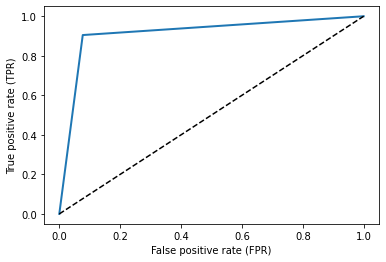

In [60]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred)
def plot_roc_curve(fpr, tpr, label =None):
    plt.plot(fpr, tpr, linewidth=2, label =label)
    plt.plot([0,1],[0,1], "k--")
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
plot_roc_curve(fpr,tpr)
plt.show()

Finalmente tras probar ambos modelos de aprendizaje bajo las métricas de rendimiento
se puede comprobar que objetivamente los dos funcionaron casi a la misma efectividad en este caso
considerando los parámetros del problema, por lo que, no se podría definir a alguno como mejor, 
lo cual podría cambiar solamente si se toman distintas variables para el ajuste de los modelos en los datos.